### 랜덤포레스트
- 순서: 데이터 전처리 -> (반복: 학습 -> 결과 확인 -> 파라미터 조정) -> 모델 저장
- 서버에서는 저장된 모델을 불러와서 예측만 하기
- 현재 문제: 데이터 전처리 후 라벨 true 값이 너무 적음 -> 전처리 다시하기

#### https://www.datacamp.com/community/tutorials/random-forests-classifier-python

##### 1. 라이브러리 가져오기

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 

##### 2. 데이터셋 로드 -> 컬럼 추출

In [2]:
#Load dataset
temp = pd.read_csv("outFile.csv",engine='python',encoding='cp949')

In [3]:
#사용할 변수, 라벨만 추출
tmp = temp[["age", "sex", 
            "D_1_1","BO1_1", "BS3_1", "BS3_2", 
             "BH2_61", "BE5_1","BD2_1",
            
            "HE_fh", "HE_HPfh1", "HE_HPfh2", "HE_HPfh3", "HE_HLfh1", "HE_HLfh2", "HE_HLfh3", "HE_IHDfh1", "HE_IHDfh2", "HE_IHDfh3",
            "HE_STRfh1", "HE_STRfh2", "HE_STRfh3", "HE_DMfh1", "HE_DMfh2", "HE_DMfh3", "HE_THfh1", "HE_THfh2", "HE_THfh3",
            "HE_HBfh1", "HE_HBfh2", "HE_HBfh3",
            
            "DI1_dg", "DI1_2", "DI2_dg", "DI2_2",
            "DE1_dg", "DE1_32",
            "HE_BMI",
            "EC_wht_23", "Total_slp_wk", "Total_slp_wd",
            "BP1", "BE3_33",
            "HE_DMdg"]]

In [4]:
mean_round= ["HE_BMI", 
             "Total_slp_wk", "Total_slp_wd", "BE3_33"]

drop_col = ["HE_DMdg"]
nine_nine_nine = [ "BS3_2"]
nine= ["D_1_1","BO1_1", "BS3_1","BH2_61", "BE5_1",
        "BD2_1",
        "HE_fh", "HE_HPfh1", "HE_HPfh2", "HE_HPfh3", "HE_HLfh1", "HE_HLfh2", "HE_HLfh3", "HE_IHDfh1", "HE_IHDfh2", "HE_IHDfh3",
        "HE_STRfh1", "HE_STRfh2", "HE_STRfh3", "HE_DMfh1", "HE_DMfh2", "HE_DMfh3", "HE_THfh1", "HE_THfh2", "HE_THfh3",
        "HE_HBfh1", "HE_HBfh2", "HE_HBfh3", 
        "DI1_dg", "DI1_2", "DI2_dg", "DI2_2",  "DE1_dg", 
        "BP1"]

##### 3. 데이터 전처리
- 모름/무응답 행 제거
- 중복 값 처리
- 컬럼 합치기
- null 처리 된 0 복원 등

In [5]:
for i in nine_nine_nine:
    tmp[i].fillna(999, inplace = True)  #null 대체

for i in nine:
    tmp[i].fillna(999, inplace = True)  #null 대체
    
for i in mean_round:
    tmp[i] =tmp[i].fillna((round(tmp[i].mean(),0)))
    
tmp = tmp.dropna(how='any',axis=0) #null  제거
tmp[:] = np.nan_to_num(tmp)

In [6]:
#고혈압
tmp['HE_HPfh'] = 0
tmp.loc[tmp.HE_HPfh1 == 1, 'HE_HPfh'] = 1
tmp.loc[tmp.HE_HPfh1 == 8, 'HE_HPfh'] = 8
tmp.loc[tmp.HE_HPfh1 == 9, 'HE_HPfh'] = 9
tmp.loc[tmp.HE_HPfh2 == 1, 'HE_HPfh'] = 1
tmp.loc[tmp.HE_HPfh2 == 8, 'HE_HPfh'] = 8
tmp.loc[tmp.HE_HPfh2 == 9, 'HE_HPfh'] = 9
tmp.loc[tmp.HE_HPfh3 == 1, 'HE_HPfh'] = 1
tmp.loc[tmp.HE_HPfh3 == 8, 'HE_HPfh'] = 8
tmp.loc[tmp.HE_HPfh3 == 9, 'HE_HPfh'] = 9
del tmp['HE_HPfh1']
del tmp['HE_HPfh2']
del tmp['HE_HPfh3']

#고지혈증
tmp['HE_HLfh'] = 0
tmp.loc[tmp.HE_HLfh1 == 1, 'HE_HLfh'] = 1
tmp.loc[tmp.HE_HLfh1 == 8, 'HE_HLfh'] = 8
tmp.loc[tmp.HE_HLfh1 == 9, 'HE_HLfh'] = 9
tmp.loc[tmp.HE_HLfh2 == 1, 'HE_HLfh'] = 1
tmp.loc[tmp.HE_HLfh2 == 8, 'HE_HLfh'] = 8
tmp.loc[tmp.HE_HLfh2 == 9, 'HE_HLfh'] = 9
tmp.loc[tmp.HE_HLfh3 == 1, 'HE_HLfh'] = 1
tmp.loc[tmp.HE_HLfh3 == 8, 'HE_HLfh'] = 8
tmp.loc[tmp.HE_HLfh3 == 9, 'HE_HLfh'] = 9
del tmp['HE_HLfh1']
del tmp['HE_HLfh2']
del tmp['HE_HLfh3']

#허혈성심장질환
tmp['HE_IHDfh'] = 0
tmp.loc[tmp.HE_IHDfh1 == 1, 'HE_IHDfh'] = 1
tmp.loc[tmp.HE_IHDfh1 == 8, 'HE_IHDfh'] = 8
tmp.loc[tmp.HE_IHDfh1 == 9, 'HE_IHDfh'] = 9
tmp.loc[tmp.HE_IHDfh2 == 1, 'HE_IHDfh'] = 1
tmp.loc[tmp.HE_IHDfh2 == 8, 'HE_IHDfh'] = 8
tmp.loc[tmp.HE_IHDfh2 == 9, 'HE_IHDfh'] = 9
tmp.loc[tmp.HE_IHDfh3 == 1, 'HE_IHDfh'] = 1
tmp.loc[tmp.HE_IHDfh3 == 8, 'HE_IHDfh'] = 8
tmp.loc[tmp.HE_IHDfh3 == 9, 'HE_IHDfh'] = 9
del tmp['HE_IHDfh1']
del tmp['HE_IHDfh2']
del tmp['HE_IHDfh3']

#뇌졸중
tmp['HE_STRfh'] = 0
tmp.loc[tmp.HE_STRfh1 == 1, 'HE_STRfh'] = 1
tmp.loc[tmp.HE_STRfh1 == 8, 'HE_STRfh'] = 8
tmp.loc[tmp.HE_STRfh1 == 9, 'HE_STRfh'] = 9
tmp.loc[tmp.HE_STRfh2 == 1, 'HE_STRfh'] = 1
tmp.loc[tmp.HE_STRfh2 == 8, 'HE_STRfh'] = 8
tmp.loc[tmp.HE_STRfh2 == 9, 'HE_STRfh'] = 9
tmp.loc[tmp.HE_STRfh3 == 1, 'HE_STRfh'] = 1
tmp.loc[tmp.HE_STRfh3 == 8, 'HE_STRfh'] = 8
tmp.loc[tmp.HE_STRfh3 == 9, 'HE_STRfh'] = 9
del tmp['HE_STRfh1']
del tmp['HE_STRfh2']
del tmp['HE_STRfh3']

#당뇨병
tmp['HE_DMfh'] = 0
tmp.loc[tmp.HE_DMfh1 == 1, 'HE_DMfh'] = 1
tmp.loc[tmp.HE_DMfh1 == 8, 'HE_DMfh'] = 8
tmp.loc[tmp.HE_DMfh1 == 9, 'HE_DMfh'] = 9
tmp.loc[tmp.HE_DMfh2 == 1, 'HE_DMfh'] = 1
tmp.loc[tmp.HE_DMfh2 == 8, 'HE_DMfh'] = 8
tmp.loc[tmp.HE_DMfh2 == 9, 'HE_DMfh'] = 9
tmp.loc[tmp.HE_DMfh3 == 1, 'HE_DMfh'] = 1
tmp.loc[tmp.HE_DMfh3 == 8, 'HE_DMfh'] = 8
tmp.loc[tmp.HE_DMfh3 == 9, 'HE_DMfh'] = 9
del tmp['HE_DMfh1']
del tmp['HE_DMfh2']
del tmp['HE_DMfh3']

#B형간염 
tmp['HE_HBfh'] = 0
tmp.loc[tmp.HE_HBfh1 == 1, 'HE_HBfh'] = 1
tmp.loc[tmp.HE_HBfh1 == 8, 'HE_HBfh'] = 8
tmp.loc[tmp.HE_HBfh1 == 9, 'HE_HBfh'] = 9
tmp.loc[tmp.HE_HBfh2 == 1, 'HE_HBfh'] = 1
tmp.loc[tmp.HE_HBfh2 == 8, 'HE_HBfh'] = 8
tmp.loc[tmp.HE_HBfh2 == 9, 'HE_HBfh'] = 9
tmp.loc[tmp.HE_HBfh3 == 1, 'HE_HBfh'] = 1
tmp.loc[tmp.HE_HBfh3 == 8, 'HE_HBfh'] = 8
tmp.loc[tmp.HE_HBfh3 == 9, 'HE_HBfh'] = 9
del tmp['HE_HBfh1']
del tmp['HE_HBfh2']
del tmp['HE_HBfh3']


In [7]:
tmp.HE_DMdg.isnull().value_counts()

False    7699
Name: HE_DMdg, dtype: int64

##### 4. feature, label 지정

In [8]:
from sklearn.model_selection import train_test_split

feature_cols = ["age", "sex", 
            "D_1_1","BO1_1", "BS3_1", "BS3_2", 
             "BH2_61", "BE5_1","BD2_1",

            "DI1_dg", "DI1_2", "DI2_dg", "DI2_2",
            "DE1_dg", 
            "HE_BMI",
            "EC_wht_23", "Total_slp_wk", "Total_slp_wd",
            "BP1", "BE3_33", "DE1_32", 
            
            "HE_fh", "HE_HPfh", "HE_HLfh", "HE_IHDfh",
             "HE_DMfh"]

            
X = tmp[feature_cols] # Features
y = tmp.HE_DMdg # Target variable(label)

##### 5. train, test data 나누기
- 70% training, 30% test

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

##### 6. 트리 생성
- 학습 및 정확도 
- percentage: predict_proba
- classification: predict
- 정확도 함수: https://scikit-learn.org/stable/modules/model_evaluation.html

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)#Create a Gaussian Classifier
clf.fit(x_train,y_train) #train model
y_pred=clf.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(clf, X, y, cv=10, scoring="roc_auc")

print("=== Confusion Matrix ===") #true positive/ false negative/ false positive/ true nagative
print(confusion_matrix(y_test, y_pred)) #evaluate the accuracy of a classification
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[2107    2]
 [  13  188]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00      2109
        1.0       0.99      0.94      0.96       201

avg / total       0.99      0.99      0.99      2310



=== All AUC Scores ===
[0.99962494 0.98910798 0.97857981 0.98947183 0.97934272 0.97848592
 0.98025822 0.99558685 0.99431845 0.99518978]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9879966510586241


In [13]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

print("roc_auc: ",metrics.roc_auc_score(y_test, y_pred))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

roc_auc:  0.9671875331733933
Accuracy:  0.9935064935064936


##### 7. 생성된 트리 시각화 및 주요 특성 확인

In [15]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

DE1_dg          0.429200
DE1_32          0.395325
age             0.021560
HE_BMI          0.020359
DI2_2           0.019694
DI1_2           0.018409
DI1_dg          0.008233
HE_DMfh         0.007399
Total_slp_wk    0.007018
BD2_1           0.006514
Total_slp_wd    0.006432
EC_wht_23       0.006411
D_1_1           0.005500
BO1_1           0.005148
DI2_dg          0.004892
BE3_33          0.004773
BP1             0.004514
BS3_1           0.003894
HE_fh           0.003670
HE_HLfh         0.003517
HE_HPfh         0.003170
BH2_61          0.003124
BS3_2           0.003073
BE5_1           0.002822
HE_IHDfh        0.002676
sex             0.002671
dtype: float64

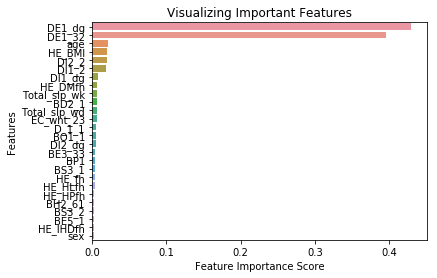

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

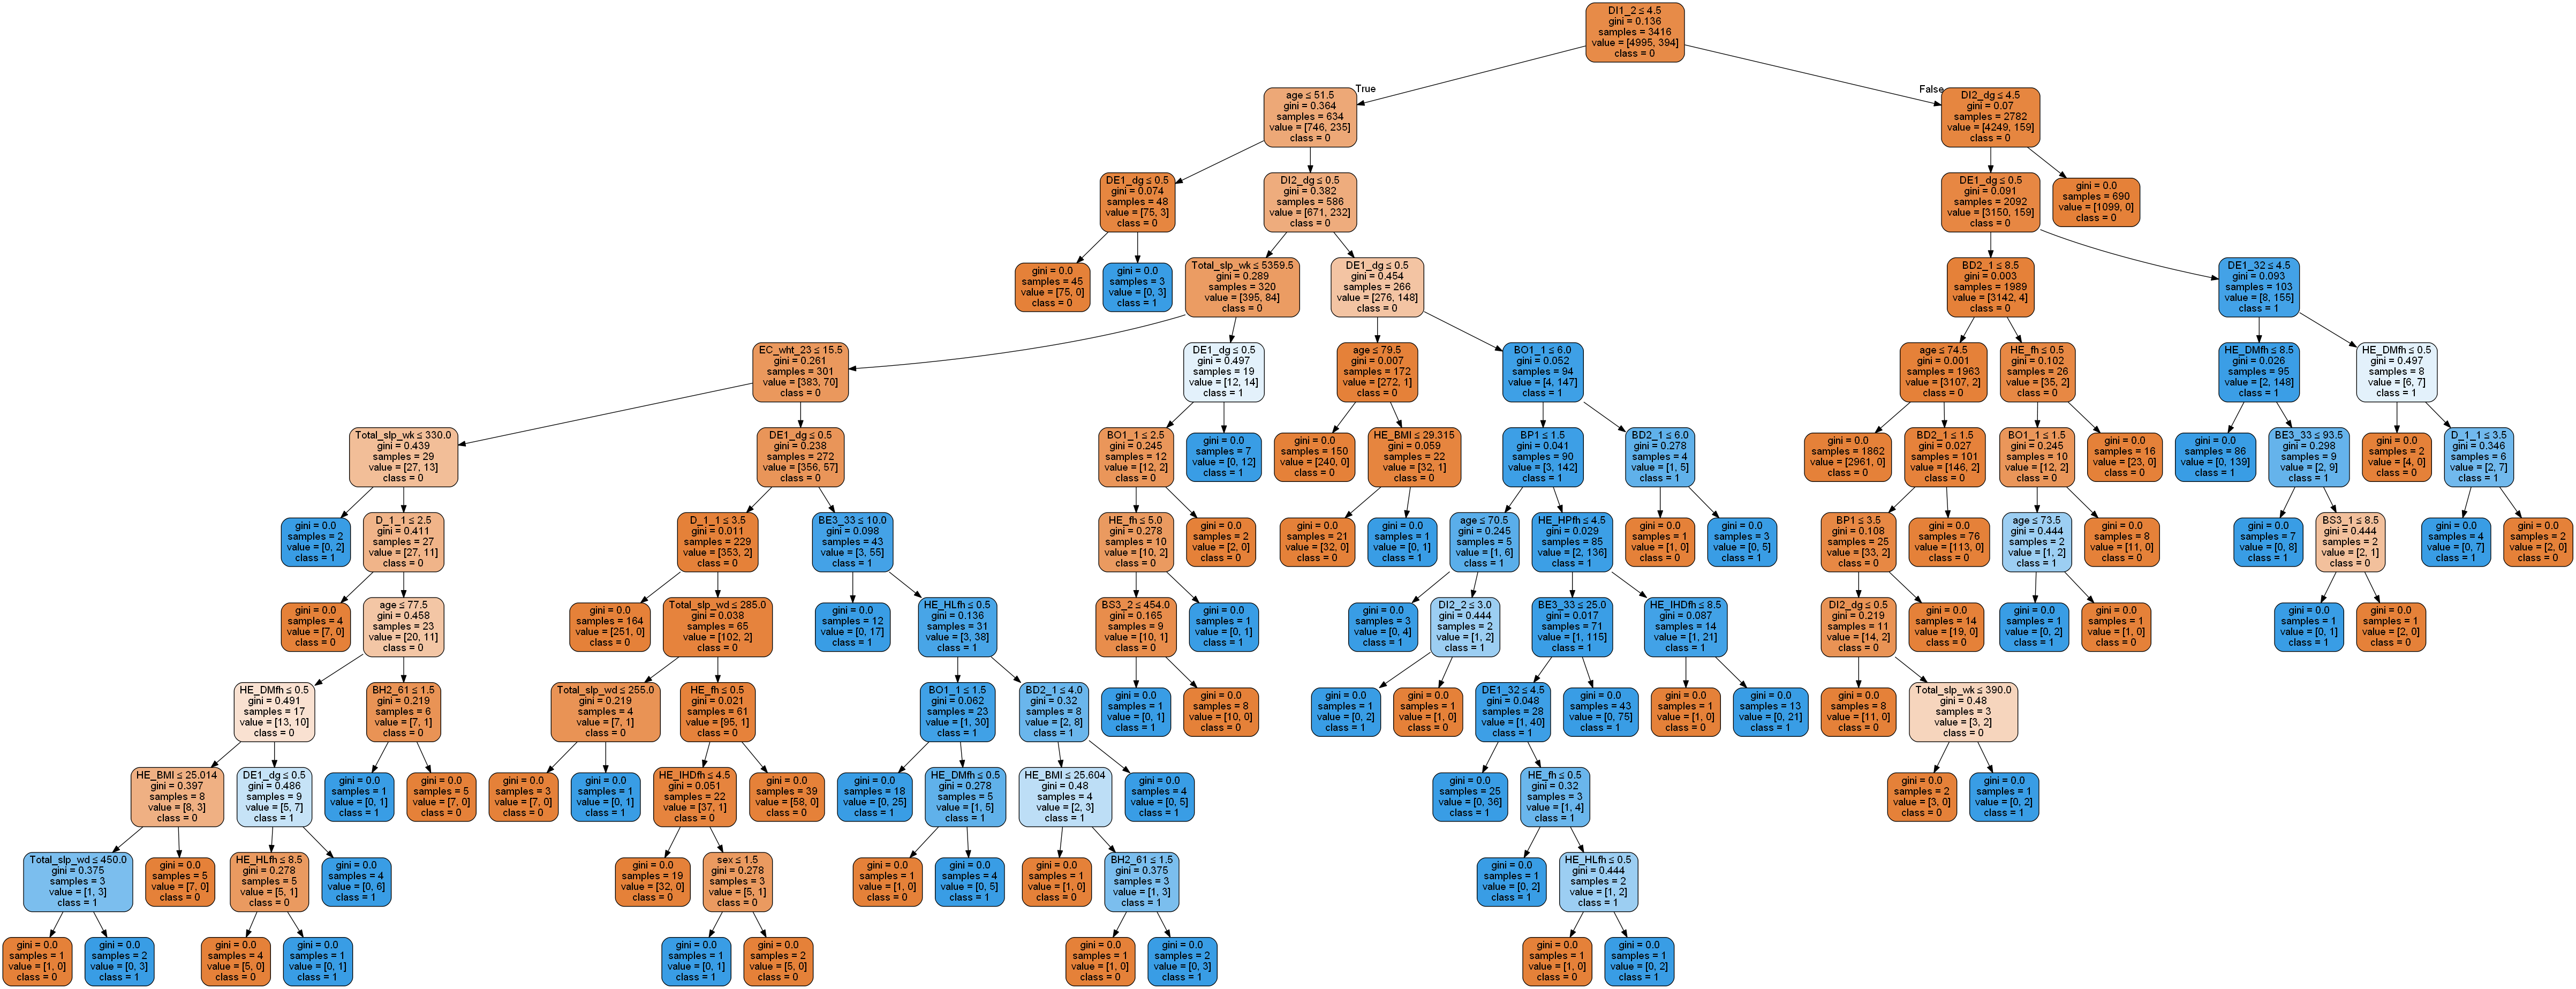

In [18]:
dot_data = StringIO()
export_graphviz(clf.estimators_[1], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('random_diabetes.png')
Image(graph.create_png())

##### 8. 파라미터 조정

In [62]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 15)]
#n_estimators=[20, 30, 40, 50, 60, 70]
max_features = [int(x) for x in np.linspace(start = 1, stop = 25, num = 25)]
max_features.append('log2')
max_features.append(None)
max_features.append('auto')
max_features.append('sqrt')

max_depth = [int(x) for x in np.linspace(start = 1, stop = 90, num = 90)]
#max_depth = [5, 7, 10, 15]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
               50,
               51,
           

In [63]:
from sklearn.model_selection import GridSearchCV

# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, n_iter = 100, cv = 3, verbose=2)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'n_estimators': [10, 23, 37, 50, 64, 77, 91, 105, 118, 132, 145, 159, 172, 186, 200], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 'log2', None, 'auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1..., 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, None], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', ra

In [64]:
print(rf_random.best_params_)

{'n_estimators': 118, 'max_features': 'sqrt', 'max_depth': 59, 'bootstrap': True}


- 추출한 파라미터 평가
- 참고: https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

In [68]:
opti_model=RandomForestClassifier(n_estimators=118, max_depth=59)#Create a Gaussian Classifier
opti_model.fit(x_train,y_train) #train model
y_pred=opti_model.predict(x_test)

In [69]:
print("roc_auc: ",metrics.roc_auc_score(y_test, y_pred))
print("accuracy_score: ",metrics.accuracy_score(y_test, y_pred))

roc_auc:  0.9727262462733718
accuracy_score:  0.9922077922077922


In [ ]:
y_pred=opti_model.predict_proba(x_test)
import math
window_data  = np.array(y_pred)
#for i in range(len(window_data)):
#    print(round(window_data[i][0], 2), ", ", round(window_data[i][1], 2))
print(round(window_data[i][0], 2))

##### 9. 모델 저장 및 저장된 모델 불러와서 테스트하기
- ***** 서버측에서 머신러닝 사용시 모델만 불러와서 사용하면 된다.*****
- 참고: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [141]:
import pickle
# 모델 저장
filename = 'randomtree_diabetes.sav'
pickle.dump(clf, open(filename, 'wb'))
 
# 모델 불러오기
loaded_model = pickle.load(open(filename, 'rb'))
yyy = loaded_model.predict_proba(x_test)
result = loaded_model.score(x_test, y_test)

In [139]:
result

0.9926406926406927

##### AUC 그래프

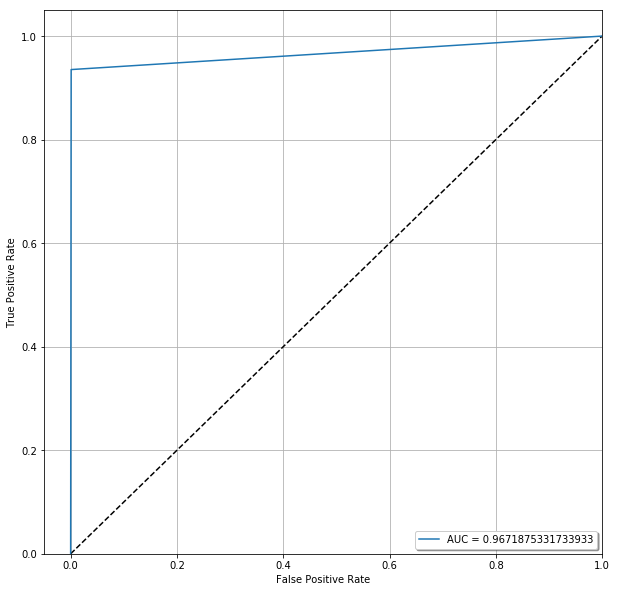

In [19]:
# overall accuracy
acc = clf.score(x_test,y_test)

# get roc/auc info
Y_score = clf.predict_proba(x_test)[:,1]
fpr = dict()
tpr = dict()
fpr, tpr, _ = roc_curve(y_test, y_pred)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

# make the plot
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()